STEP 1: IMPORT LIBRARIES


In [154]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.mixture import GaussianMixture

STEP 2: LOADING THE IRIS DATASET

In [155]:
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [156]:
print (iris.data)
iris.data.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

(150, 4)

In [157]:
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [158]:
featuresAll=[]
features = iris.data[: , [0,1,2,3]]
features.shape


(150, 4)

In [159]:
# Extract the values for targets
targets = iris.target
targets.reshape(targets.shape[0],-1)
targets.shape

(150,)

In [160]:
for observation in features:
    featuresAll.append([observation[0] + observation[1] + observation[2] + observation[3]])
print (featuresAll)

[[10.2], [9.5], [9.4], [9.399999999999999], [10.2], [11.4], [9.700000000000001], [10.1], [8.9], [9.6], [10.8], [9.999999999999998], [9.299999999999999], [8.5], [11.2], [12.000000000000002], [11.000000000000002], [10.3], [11.5], [10.7], [10.7], [10.700000000000001], [9.399999999999999], [10.599999999999998], [10.299999999999999], [9.799999999999999], [10.4], [10.399999999999999], [10.2], [9.7], [9.7], [10.700000000000001], [10.9], [11.299999999999999], [9.7], [9.599999999999998], [10.5], [10.0], [8.9], [10.2], [10.100000000000001], [8.4], [9.1], [10.7], [11.2], [9.5], [10.699999999999998], [9.399999999999999], [10.7], [9.9], [16.299999999999997], [15.600000000000001], [16.4], [13.100000000000001], [15.4], [14.3], [15.9], [11.600000000000001], [15.4], [13.200000000000001], [11.5], [14.600000000000001], [13.2], [15.1], [13.4], [15.600000000000001], [14.6], [13.6], [14.4], [13.1], [15.700000000000003], [14.2], [15.200000000000001], [14.799999999999997], [14.900000000000002], [15.4], [15.79

In [161]:
df = pd.DataFrame(iris.data, columns = iris.feature_names) #dataframe form of dataset
df["species"] = iris.target

Data Visualization

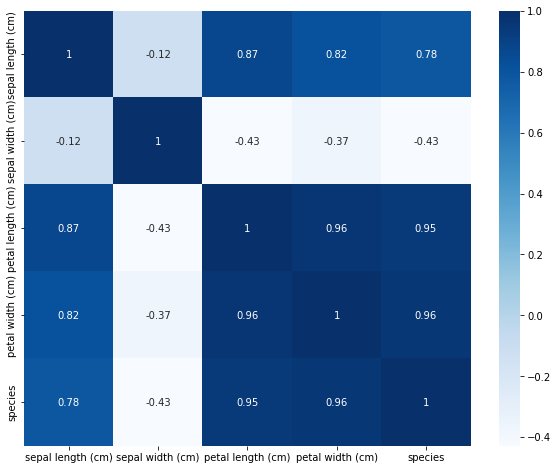

In [162]:
import seaborn as sns
import pandas as pd
corr = df.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap='Blues', annot=True)
plt.show()

K MEANS IMPLEMENTATION

In [163]:
import numpy as np
X1 = np.asarray(featuresAll)
X1 = X1.reshape(-1,1)

In [164]:
X1.shape

(150, 1)

In [165]:
y = iris.target 

y.shape

(150,)

In [166]:
X3 = df.iloc[:, 0:5]  
Y3 = df['species']

In [167]:
X3.shape

(150, 5)

Splittting of dataset

In [168]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.4, random_state=0)
print(" X3_train",X3_train)
print("X3_test",X3_test)
print("y_train",y_train)
print("y_test",y_test)

 X3_train      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
85                 6.0               3.4  ...               1.6        1
30                 4.8               3.1  ...               0.2        0
101                5.8               2.7  ...               1.9        2
94                 5.6               2.7  ...               1.3        1
64                 5.6               2.9  ...               1.3        1
..                 ...               ...  ...               ...      ...
9                  4.9               3.1  ...               0.1        0
103                6.3               2.9  ...               1.8        2
67                 5.8               2.7  ...               1.0        1
117                7.7               3.8  ...               2.2        2
47                 4.6               3.2  ...               0.2        0

[90 rows x 5 columns]
X3_test      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
114       

K MEANS ALGORITHM

In [169]:
km = KMeans(n_clusters=3, max_iter =1000)

In [170]:
km.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [171]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [172]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [173]:
df[' K Mean predicted label'] = km.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,K Mean predicted label
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [174]:
km4 = KMeans(n_clusters=4, max_iter =1000)

In [175]:
km4.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [176]:
km4.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [7.38571429, 3.13571429, 6.22857143, 2.08571429, 2.        ],
       [5.87959184, 2.75306122, 4.23673469, 1.32244898, 1.02040816],
       [6.34324324, 2.92972973, 5.29189189, 1.98918919, 1.94594595]])

MAKING AND PLOTTING BLOBS FOR IRIS DATASET

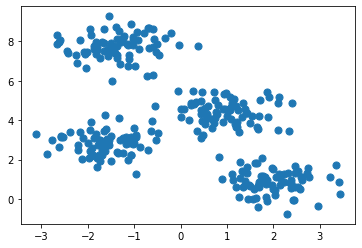

In [179]:
from sklearn.datasets.samples_generator import make_blobs
X1, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X1[:, 0], X1[:, 1], s=50);

PRINTING LABELS FOR NEW GIVEN INSTANCES

In [180]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
X_new = X_new.reshape(-1,1)
X_new.shape

(8, 1)

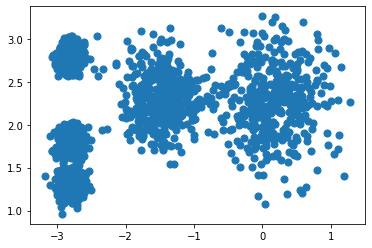

In [181]:
from sklearn.datasets.samples_generator import make_blobs
X_vor, y_vor = make_blobs(n_samples=2000, centers= np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]), cluster_std= np.array([0.4, 0.3, 0.1, 0.1, 0.1]), random_state=0)
plt.scatter(X_vor[:, 0], X_vor[:, 1], s=50);

VORONOI PLOT

In [182]:
km8 = KMeans(n_clusters=8, max_iter =1000)

In [183]:
#km8.fit(iris.data)

In [184]:
km8.fit(X_vor)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [185]:
centers2= km8.cluster_centers_

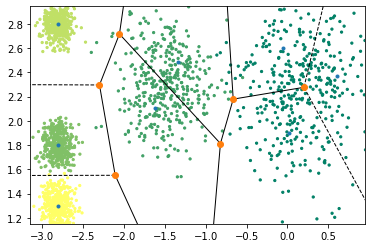

In [186]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(centers2) 
voronoi_plot_2d(vor) 
plt.scatter(X_vor[:, 0], X_vor[:, 1], c=y_vor, s=5, cmap='summer') 

In [187]:
km8.labels_

array([4, 5, 5, ..., 1, 4, 6], dtype=int32)

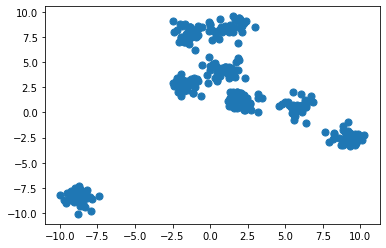

In [188]:
from sklearn.datasets.samples_generator import make_blobs
X_new, y_true = make_blobs(n_samples=300, centers=8,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_new[:, 0], X_new[:, 1], s=50);

In [189]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [190]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

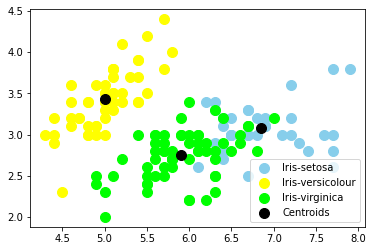

In [191]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'skyblue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'lime', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [192]:
kmeans2 = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans2 = kmeans2.fit_predict(x)

In [193]:
kmeans2.cluster_centers_

array([[4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [6.03684211, 2.70526316, 5.        , 1.77894737],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.2       , 2.36666667, 3.38333333, 1.01666667],
       [5.62272727, 2.70909091, 4.11818182, 1.28636364],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [6.44210526, 2.97894737, 4.59473684, 1.43157895]])

In [194]:
kmeans2.labels_

array([5, 0, 0, 0, 5, 5, 0, 5, 0, 0, 5, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       0, 5, 0, 0, 5, 5, 5, 0, 0, 5, 5, 5, 0, 0, 5, 5, 0, 5, 5, 0, 0, 5,
       5, 0, 5, 0, 5, 0, 7, 7, 7, 4, 7, 4, 7, 3, 7, 4, 3, 4, 4, 7, 4, 7,
       4, 4, 1, 4, 1, 4, 1, 7, 7, 7, 7, 7, 7, 3, 4, 3, 4, 1, 4, 7, 7, 7,
       4, 4, 4, 7, 4, 3, 4, 4, 4, 7, 3, 4, 6, 1, 2, 6, 6, 2, 4, 2, 6, 2,
       6, 1, 6, 1, 1, 6, 6, 2, 2, 1, 6, 1, 2, 1, 6, 2, 1, 1, 6, 2, 2, 2,
       6, 1, 1, 2, 6, 6, 1, 6, 6, 6, 1, 6, 6, 6, 1, 6, 6, 1], dtype=int32)

CALCULATING VALUE K USING ELBOW METHOD

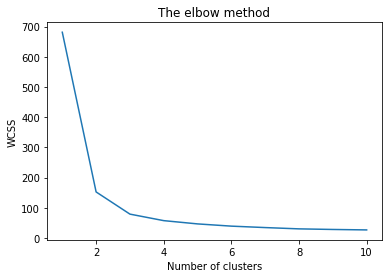

In [195]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [235]:

k=3
kmeans3 = KMeans(n_clusters=k, init='random', n_init=1, random_state=0, max_iter=1)
kmeans3.fit(x)
y_kmeans3 = kmeans3.predict(x)
 # cluster index for each observation centers = kmeans.cluster_centers_ # cluster center coordinates plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='summer') plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)



In [236]:
k=8
kmeans8 = KMeans(n_clusters=k, init='random', n_init=1, random_state=0, max_iter=1)
kmeans8.fit(x)
y_kmeans8 = kmeans8.predict(x)

In [237]:
centers = kmeans3.cluster_centers_

In [239]:
centers = kmeans8.cluster_centers_

In [238]:
print(kmeans3.inertia_)

85.6409149170066


In [240]:
print(kmeans8.inertia_)

40.61295373059778


GMM

In [199]:
from sklearn.mixture import GaussianMixture
nclusters=4
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(x)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(x)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2])

In [200]:
df_data = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df_target = pd.DataFrame(data=iris.target, columns=["class"])


Report value of np.sum(y_pred==y) / len(y_pred)

In [201]:
df_target = np.array(df_target).reshape(150,)

np.sum(y_cluster_gmm==df_target) / len(y_cluster_gmm)

0.06666666666666667

In [245]:
from scipy import stats
from scipy.stats import mstats
stats.mode(y_cluster_gmm)
mstats.mode(y_cluster_gmm)

ModeResult(mode=array([1.]), count=array([50.]))

In [202]:
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  ...  species   K Mean predicted label
0                  5.1               3.5  ...        0                        1
1                  4.9               3.0  ...        0                        1
2                  4.7               3.2  ...        0                        1
3                  4.6               3.1  ...        0                        1
4                  5.0               3.6  ...        0                        1
..                 ...               ...  ...      ...                      ...
145                6.7               3.0  ...        2                        2
146                6.3               2.5  ...        2                        0
147                6.5               3.0  ...        2                        2
148                6.2               3.4  ...        2                        2
149                5.9               3.0  ...        2                        0

[150 

In [203]:
wh1 = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

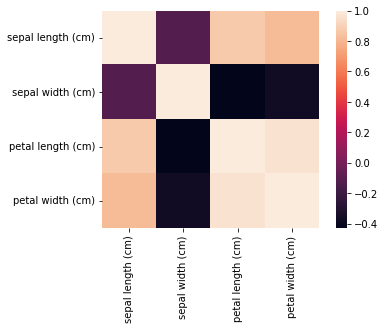

In [204]:
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True)

In [205]:
def doGMM(x, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(x)
    clust_labels3 = model.predict(x)
    return (clust_labels3)

clust_labels3 = doGMM(wh1,2)
gmm = pd.DataFrame(clust_labels3)
#wh1.insert((wh1.shape[1]),'gmm',gmm)


Predicting labels for X_new

In [207]:
X_new1= iris.data[:, :2]
y_new1= iris.target

In [225]:
X_news = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [220]:
km_new = KMeans(n_clusters=nclusters,random_state=0)
km_new.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [226]:
y_new_result = km_new.fit_predict(X_news)

In [227]:
print(y_new_result)

[0 2 1 3]


Comparing interias of k=3 and k=8

In [241]:
print(kmeans3.inertia_)

85.6409149170066


In [242]:
print(kmeans8.inertia_)

40.61295373059778


The inertia at k=3 is lot better than at k=8